Input graph
[0, 67, 6, 16, 2, 79, 44, 60, 40, 71]
[67, 0, 59, 67, 8, 26, 35, 6, 64, 65]
[6, 59, 0, 45, 22, 49, 97, 90, 75, 21]
[16, 67, 45, 0, 75, 21, 6, 18, 92, 87]
[2, 8, 22, 75, 0, 19, 15, 83, 2, 11]
[79, 26, 49, 21, 19, 0, 21, 71, 99, 29]
[44, 35, 97, 6, 15, 21, 0, 62, 50, 17]
[60, 6, 90, 18, 83, 71, 62, 0, 50, 13]
[40, 64, 75, 92, 2, 99, 50, 50, 0, 71]
[71, 65, 21, 87, 11, 29, 17, 13, 71, 0]


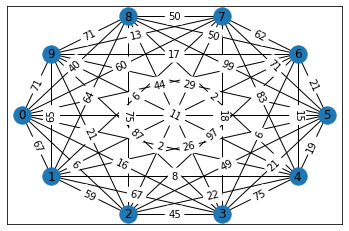

Build skeleton. Iteration 1
[0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Connected vertices: [1, 0, 0, 0, 1, 0, 0, 0, 0, 0]
Build skeleton. Iteration 2
[0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0, 0, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Connected vertices: [1, 0, 0, 0, 1, 0, 0, 0, 1, 0]
Build skeleton. Iteration 3
[0, 0, 6, 0, 2, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0, 0, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0

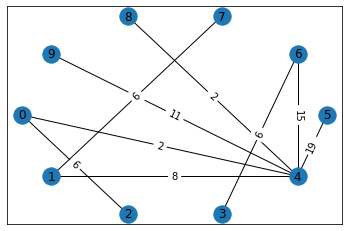

After cluster highlighting
[0, 0, 6, 0, 2, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 8, 0, 0, 6, 0, 0]
[6, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 6, 0, 0, 0]
[2, 8, 0, 0, 0, 0, 0, 0, 2, 11]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 6, 0, 0, 0, 0, 0, 0]
[0, 6, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 11, 0, 0, 0, 0, 0]


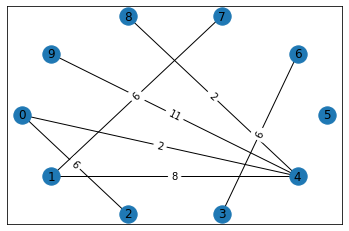

Cluster result
[1, 1, 1, 2, 1, 3, 2, 1, 1, 1]


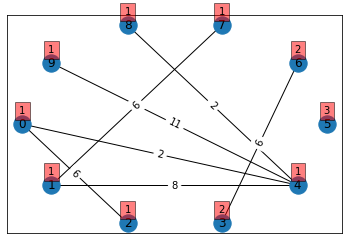

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


def print_matrix(matrix):
    for i in range(len(matrix)):
        print(matrix[i])


def build_skeleton(graph_adj, skeleton_adj, N):
    skeleton_connection = [0 for i in range(N)]
    # connect first two vertices
    build_skeleton_i = 1
    min_weight_i, min_weight_j = 0, 1
    min_weight = graph_adj[min_weight_i][min_weight_j]
    for i in range(N):
        for j in range(i + 1, N):
            if min_weight > graph_adj[i][j]:
                min_weight = graph_adj[i][j]
                min_weight_i, min_weight_j = i, j
    skeleton_adj[min_weight_i][min_weight_j] = min_weight
    skeleton_adj[min_weight_j][min_weight_i] = skeleton_adj[min_weight_i][min_weight_j]
    skeleton_connection[min_weight_i] = skeleton_connection[min_weight_j] = 1
    print("Build skeleton. Iteration {}".format(build_skeleton_i))
    print_matrix(skeleton_adj)
    print("Connected vertices: {}".format(skeleton_connection))

    # while there are non-connected vertices
    while 0 in skeleton_connection:
        build_skeleton_i += 1
        min_weight = None
        min_weight_i = min_weight_j = None
        for i in range(N):
            if skeleton_connection[i] == 1:
                for j in range(N):
                    if i == j or skeleton_connection[j] == 1 or skeleton_adj[i][j] != 0:
                        continue
                    if min_weight is None or min_weight > graph_adj[i][j]:
                        min_weight = graph_adj[i][j]
                        min_weight_i, min_weight_j = i, j
        skeleton_adj[min_weight_i][min_weight_j] = min_weight
        skeleton_adj[min_weight_j][min_weight_i] = skeleton_adj[min_weight_i][min_weight_j]
        skeleton_connection[min_weight_i] = skeleton_connection[min_weight_j] = 1
        print("Build skeleton. Iteration {}".format(build_skeleton_i))
        print_matrix(skeleton_adj)
        print("Connected vertices: {}".format(skeleton_connection))


# ! square matrix is required
def draw_graph(adj, N, clustered_vertices=None):
    # build graph
    G = nx.Graph()
    for i in range(len(adj)):
        G.add_node(i)
    for i in range(N):
        for j in range(i + 1, N):
            if adj[i][j] != 0:
                G.add_edge(i, j)
    edge_labels = {}
    for i in range(N):
        for j in range(i + 1, N):
            if adj[i][j] != 0:
                edge_labels[(i, j)] = adj[i][j]

    # draw graph
    pos = nx.shell_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # draw clusters
    if clustered_vertices is not None:
        for i in range(len(clustered_vertices)):
            current_vertex_cluster = clustered_vertices[i]
            x, y = pos[i]
            plt.text(x, y + 0.1, s=str(current_vertex_cluster), bbox=dict(facecolor='red', alpha=0.5),
                     horizontalalignment='center')
    plt.show()


def separate_clusters(graph_adj, N, K):
    # remove K - 1 max weight edges
    for c in range(K - 1):
        # find max weight edge
        max_weight = None
        max_weight_i = max_weight_j = None
        for i in range(N):
            for j in range(i + 1, N):
                if graph_adj[i][j] != 0 and (max_weight is None or graph_adj[i][j] > max_weight):
                    max_weight = graph_adj[i][j]
                    max_weight_i = i
                    max_weight_j = j
        # delete max weight edge
        graph_adj[max_weight_i][max_weight_j] = graph_adj[max_weight_j][max_weight_i] = 0


def cluster_graph(graph_adj, N):
    clustered_vertices = [-1 for i in range(N)]
    # cluster graph
    last_cluster_number = 1
    vertices_to_visit = [0]
    while len(vertices_to_visit) > 0:
        current_vertex = vertices_to_visit.pop()
        current_cluster_number = clustered_vertices[current_vertex]
        adj_vertices = []
        for j in range(N):
            if graph_adj[current_vertex][j] != 0:
                adj_vertices.append(j)
                if clustered_vertices[j] != -1:
                    current_cluster_number = clustered_vertices[j]

        if current_cluster_number == -1:  # new cluster
            current_cluster_number = last_cluster_number
            last_cluster_number += 1

        # assign current and adjacent vertices to cluster
        clustered_vertices[current_vertex] = current_cluster_number
        for adj_vertex in adj_vertices:
            if clustered_vertices[adj_vertex] == -1:
                vertices_to_visit.append(adj_vertex)
                clustered_vertices[adj_vertex] = current_cluster_number
            elif adj_vertex in vertices_to_visit:
                vertices_to_visit.remove(adj_vertex)

        # switch to next cluster
        if len(vertices_to_visit) == 0:
            for i in range(N):
                if clustered_vertices[i] == -1:
                    vertices_to_visit.append(i)
                    break
    return clustered_vertices


# КНП (Кратчайший Незамкнутый Путь)
if __name__ == '__main__':
    N = 10  # number of vertices
    K = 3  # number clusters
    graph_adj = [[0 for j in range(N)] for i in range(N)]
    skeleton_adj = [[0 for j in range(N)] for i in range(N)]

    # generate graph weights
    for i in range(N):
        for j in range(i + 1, N):
            graph_adj[i][j] = np.random.randint(1, 100)
            graph_adj[j][i] = graph_adj[i][j]
    print('Input graph')
    print_matrix(graph_adj)
    draw_graph(graph_adj, N)

    # build skeleton
    build_skeleton(graph_adj, skeleton_adj, N)
    print('Skeleton graph')
    print_matrix(skeleton_adj)
    draw_graph(skeleton_adj, N)

    # separate clusters
    separate_clusters(skeleton_adj, N, K)
    print('After cluster highlighting')
    print_matrix(skeleton_adj)
    draw_graph(skeleton_adj, N)

    # assign vertices to clusters
    clustered_vertices = cluster_graph(skeleton_adj, N)
    print('Cluster result')
    print(clustered_vertices)
    draw_graph(skeleton_adj, N, clustered_vertices)